## CatsVsDogs

## Data Pre-processing

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

In [ ]:
path = os.listdir("C:\\Users\\Sid\\Downloads\\CatvsDogs\\train")
cls_img = []
for x in path:
    output = x.split('.')[0]
    if(output == 'dog'):
        cls_img.append('dog')
    else:
        cls_img.append('cat')
df = pd.DataFrame({'filename':path, 'class':cls_img})

## Split the data

In [ ]:
tr, te = train_test_split(df, test_size=0.2, random_state=42)
total_tr = tr.shape[0]
total_te = te.shape[0]

In [ ]:
tr = tr.reset_index(drop=True)
te = te.reset_index(drop=True)

In [ ]:
tr_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
tr_generator = tr_gen.flow_from_dataframe(
    tr, 
    "C://Users//Sid//Downloads//CatvsDogs//train", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    te, 
    "C://Users//Sid//Downloads//CatvsDogs//train", 
    x_col='filename',
    y_col='class',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


## CNN Model

## With Regularisation

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0

## Train the model

In [ ]:
history = model.fit(
    tr_generator, 
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
1334/1334 [==============================] - 710s 532ms/step - loss: 0.4111 - accuracy: 0.8130 - val_loss: 0.3645 - val_accuracy: 0.8398
Epoch 2/10
1334/1334 [==============================] - 657s 493ms/step - loss: 0.4039 - accuracy: 0.8174 - val_loss: 0.3327 - val_accuracy: 0.8582
Epoch 3/10
1334/1334 [==============================] - 636s 477ms/step - loss: 0.3952 - accuracy: 0.8235 - val_loss: 0.3303 - val_accuracy: 0.8522
Epoch 4/10
1334/1334 [==============================] - 637s 477ms/step - loss: 0.3912 - accuracy: 0.8253 - val_loss: 0.3557 - val_accuracy: 0.8428
Epoch 5/10
1334/1334 [==============================] - 642s 481ms/step - loss: 0.3856 - accuracy: 0.8312 - val_loss: 0.3275 - val_accuracy: 0.8564
Epoch 6/10
1334/1334 [==============================] - 643s 482ms/step - loss: 0.3768 - accuracy: 0.8325 - val_loss: 0.3166 - val_accuracy: 0.8668
Epoch 7/10
1334/1334 [==============================] - 636s 477ms/step - loss: 0.3746 - accuracy: 0.8375 - val_

In [ ]:
model.save("Cat_vs_Dog.h5")

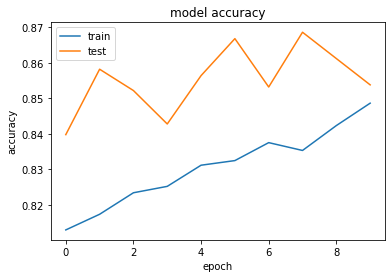

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show() 

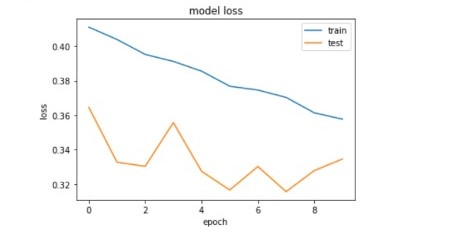

In [ ]:
model.evaluate(tr_generator)

1334/1334 [==============================] - 316s 237ms/step - loss: 0.3327 - accuracy: 0.8565


[0.33271241188049316, 0.8564500212669373]

In [ ]:
model.evaluate(val_generator)

334/334 [==============================] - 31s 94ms/step - loss: 0.3346 - accuracy: 0.8538


[0.3345525860786438, 0.8537999987602234]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(val_generator)

In [ ]:
import numpy as np
test_pred = np.argmax(pred, axis=-1)

In [ ]:
result = confusion_matrix(val_generator.classes, test_pred)
print("Confusion Matrix: ")
print(result)

Confusion Matrix: 
[[1289 1226]
 [1311 1174]]


In [ ]:
print(classification_report(val_generator.classes, test_pred))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      2515
           1       0.49      0.47      0.48      2485

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.49      0.49      0.49      5000



**Conclusion-**


We successfully developed classification model for cat-dogs dataset using CNN model. Analyze the model
accuracy and generate classification report.
1. Developed an application and test the user given inputs.
2. Analyzed the result with and without regularization/dropout
Thus, we successfully implemented Image Classification using CatsvsDogs Dataset
